In [1]:
#basic import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv',index_col=0)
test_df = pd.read_csv('test.csv',index_col=0)

In [57]:
train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [58]:
train_df['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [5]:
train_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
test_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
train_df.drop_duplicates(inplace=True)

In [8]:
cat_cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','cb_person_cred_hist_length']
num_cols = ['person_age', 'person_income','person_emp_length','loan_amnt','loan_percent_income']
target_col = ['loan_status']

In [9]:
def plot_box(df):
    numerical_cols = ['person_age', 'person_income','person_emp_length','loan_amnt','loan_percent_income']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(10,15),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='loan_status',y=column,data=df,palette='rocket', linewidth=1.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=6, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=6)
        ax.set_ylabel('Values', color='white', fontsize=6)
        
        ax.tick_params(axis='x', colors='white', labelsize=6)
        ax.tick_params(axis='y', colors='white', labelsize=6)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

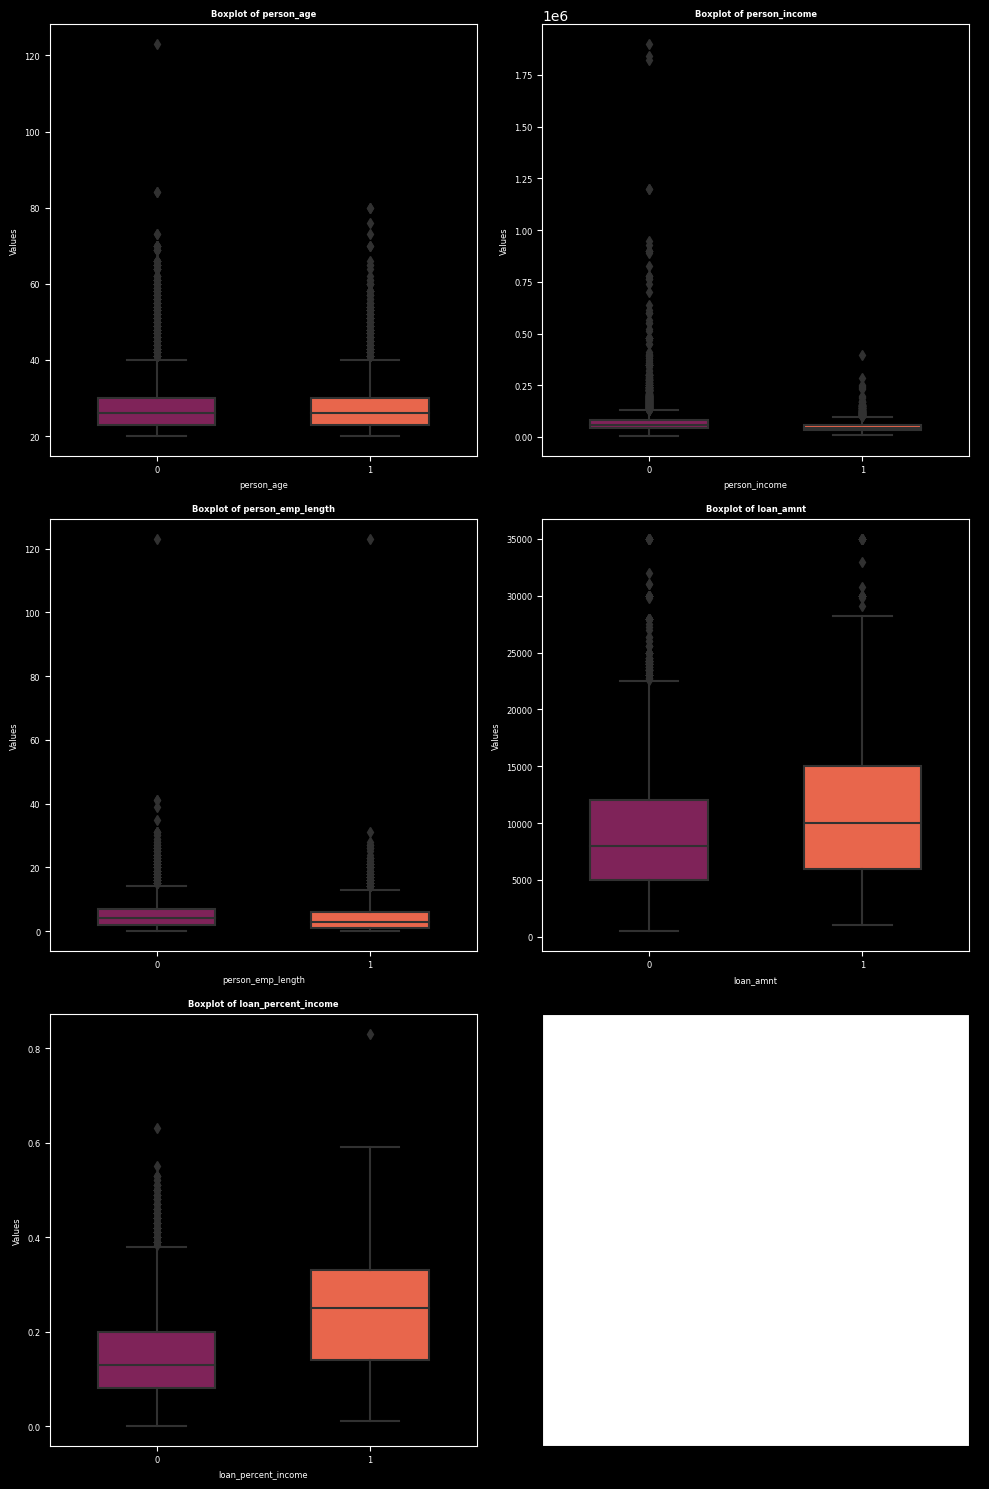

In [10]:
plot_box(train_df)

In [11]:
def plot_hist(df):
    numerical_cols = ['person_age', 'person_income','person_emp_length','loan_amnt','loan_percent_income']
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(10,15),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='winter_r',ax=ax,kde=True,hue='loan_status',bins=55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=6, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=6)
        ax.set_ylabel('Values', color='white', fontsize=6)
        
        ax.tick_params(axis='x', colors='white', labelsize=6)
        ax.tick_params(axis='y', colors='white', labelsize=6)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

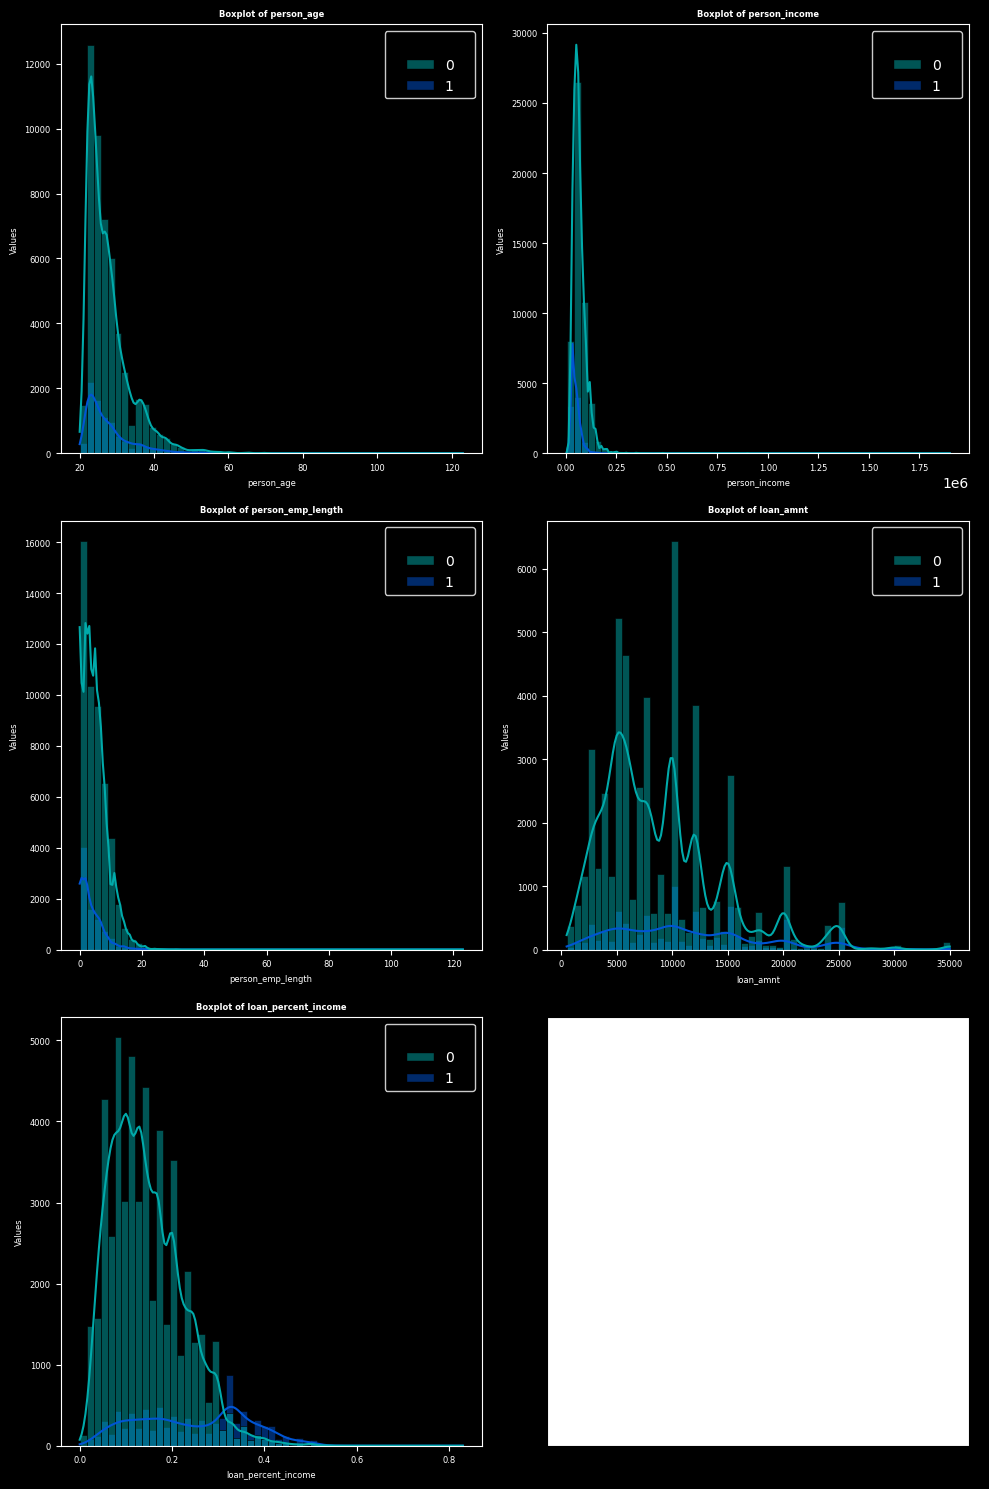

In [12]:
plot_hist(train_df)

In [13]:
def plot_count(df):
    cat_cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file','cb_person_cred_hist_length']
    num_plots = len(cat_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(8,10),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(cat_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.countplot(x=df[column],palette='Set3',ax=ax,hue=df['loan_status'])
        ax.set_title(f'Distplot of {column}', color='white', fontsize=6, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=6)
        ax.set_ylabel('Values', color='white', fontsize=6)
        
        ax.tick_params(axis='x', colors='white', labelsize=5)
        ax.tick_params(axis='y', colors='white', labelsize=5)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

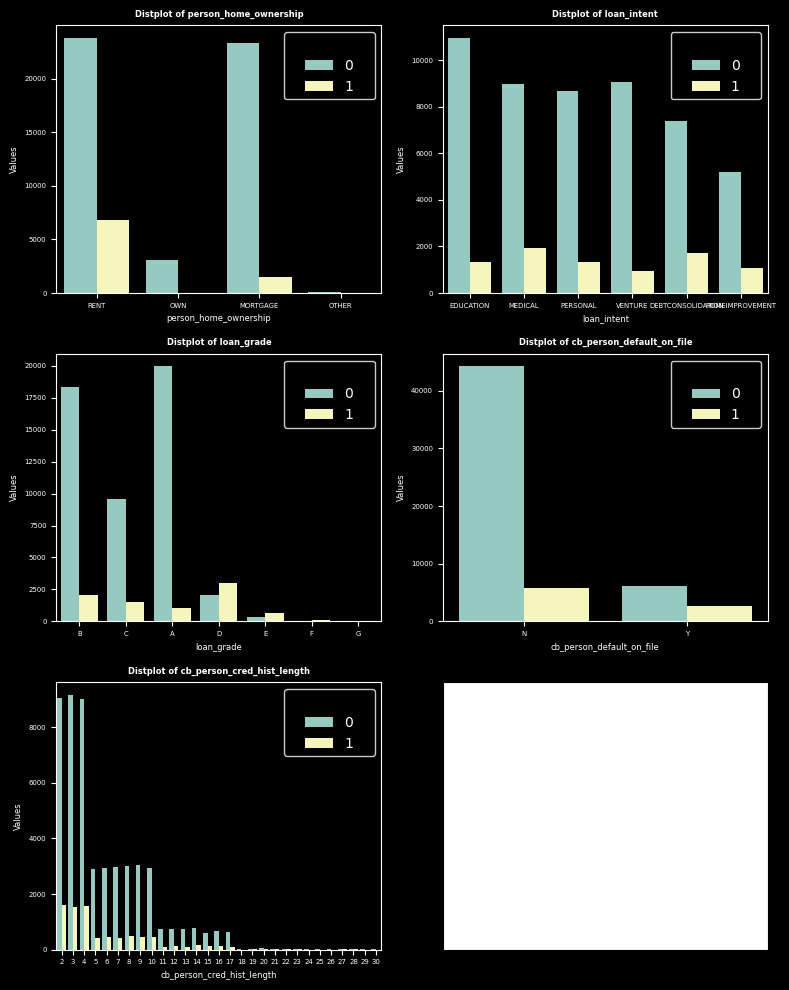

In [14]:
plot_count(train_df)

<Axes: >

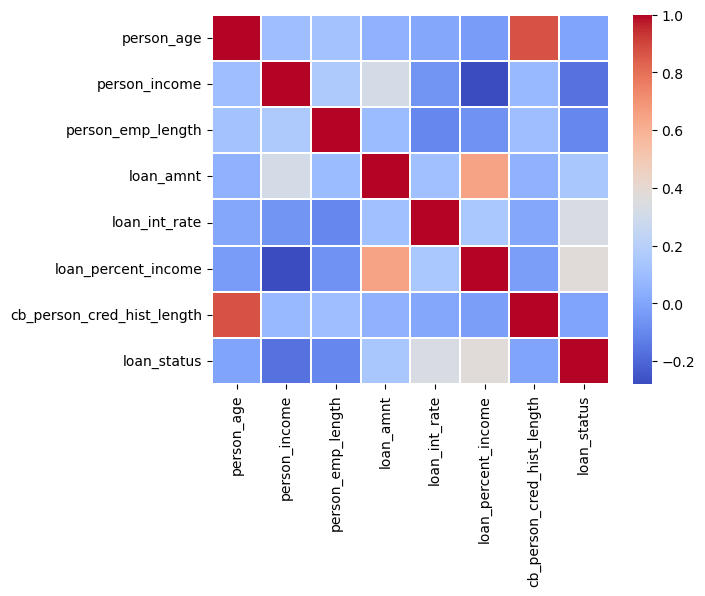

In [15]:
sns.heatmap(train_df.select_dtypes(include='number').corr(),cmap='coolwarm',linecolor='white',linewidths=1.2)

In [16]:
#sns.pairplot(train_df.select_dtypes(include='number'),palette='magma',hue='loan_status')

### Pytorch ANN

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = torch.device("mps")

In [91]:
for col in cat_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')
    train_df[col] = train_df[col].cat.codes
    test_df[col] = test_df[col].cat.codes

In [76]:
X_train = train_df.drop('loan_status',axis=1)
y_train = train_df['loan_status']
X_test = test_df

In [77]:
counter = Counter(y_train)
print("Before",counter)
ada = ADASYN()
X_train_ada,y_train_ada = ada.fit_resample(X_train,y_train)
counter = Counter(y_train_ada)
print("After",counter)

Before Counter({0: 50295, 1: 8350})
After Counter({0: 50295, 1: 50180})


In [78]:
counter = Counter(y_train)
print("Before",counter)
smote = SMOTE()
X_train_smt,y_train_smt = smote.fit_resample(X_train,y_train)
counter = Counter(y_train_smt)
print("After",counter)

Before Counter({0: 50295, 1: 8350})
After Counter({0: 50295, 1: 50295})


In [79]:
counter = Counter(y_train)
print("Before",counter)
rnd = RandomOverSampler()
X_train_rnd,y_train_rnd = rnd.fit_resample(X_train,y_train)
counter = Counter(y_train_rnd)
print("After",counter)

Before Counter({0: 50295, 1: 8350})
After Counter({0: 50295, 1: 50295})


In [81]:
counter = Counter(y_train)
svm = SVMSMOTE()
X_train_svm,y_train_svm = svm.fit_resample(X_train,y_train)
counter = Counter(y_train_svm)
print("After",counter)

After Counter({0: 50295, 1: 50295})


In [85]:
cat_test = np.stack([X_test[col] for col in cat_cols],axis=1)
cat_test = torch.LongTensor(cat_test).to(device)

In [86]:
cat_train_ada = np.stack([X_train_ada[col] for col in cat_cols],axis=1)
cat_train_ada = torch.LongTensor(cat_train_ada).to(device)
cat_train_smt = np.stack([X_train_smt[col] for col in cat_cols],axis=1)
cat_train_smt = torch.LongTensor(cat_train_smt).to(device)
cat_train_rnd = np.stack([X_train_rnd[col] for col in cat_cols],axis=1)
cat_train_rnd = torch.LongTensor(cat_train_rnd).to(device)
cat_train_svm = np.stack([X_train_svm[col] for col in cat_cols],axis=1)
cat_train_svm = torch.LongTensor(cat_train_svm).to(device)

In [93]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs_train]
emb_szs = [(4, 2), (6, 3), (7, 4), (2, 1), (29, 15)]

In [89]:
print(f"cat_train shape : {cat_train_ada.shape}")
print(f"cat_test shape : {cat_test.shape}")

cat_train shape : torch.Size([100475, 5])
cat_test shape : torch.Size([39098, 5])


In [94]:
cont_test = np.stack([test_df[col].values for col in num_cols],axis=1)
cont_test = torch.Tensor(cont_test).to(device)

In [95]:
cont_train_ada = np.stack([X_train_ada[col].values for col in num_cols],axis=1)
cont_train_ada = torch.Tensor(cont_train_ada).to(device)
cont_train_smt = np.stack([X_train_smt[col].values for col in num_cols],axis=1)
cont_train_smt = torch.Tensor(cont_train_smt).to(device)
cont_train_rnd = np.stack([X_train_rnd[col].values for col in num_cols],axis=1)
cont_train_rnd = torch.Tensor(cont_train_rnd).to(device)
cont_train_svm = np.stack([X_train_svm[col].values for col in num_cols],axis=1)
cont_train_svm = torch.Tensor(cont_train_svm).to(device)

In [97]:
print(f"cont_train shape : {cont_train_ada.shape}")
print(f"cont_test shape : {cont_test.shape}")

cont_train shape : torch.Size([100475, 5])
cont_test shape : torch.Size([39098, 5])


In [104]:
y_train

tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [0]], device='mps:0')

In [114]:
y_train_ada = torch.LongTensor(np.array(y_train_ada).reshape(-1,1)).to(device)
y_train_rnd = torch.LongTensor(np.array(y_train_rnd).reshape(-1,1)).to(device)
y_train_smt = torch.LongTensor(np.array(y_train_smt).reshape(-1,1)).to(device)
y_train_svm = torch.LongTensor(np.array(y_train_svm).reshape(-1,1)).to(device)

In [99]:
class Model(nn.Module):
    #constructor for model
    def __init__(self,emb_szs,n_cont,layers,out_size,p=0.4):
        #call parent const
        super(Model,self).__init__()
        #embedding for categorical variables
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        n_emb = sum([nf for ni,nf in emb_szs])
        #batchnorm for cont
        self.bn_cont = nn.BatchNorm1d(n_cont)
        n_in = n_cont + n_emb
        
        layerlist = []
        for i in layers:
            #Linear -> RElu ->batchnorm -> Drop
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_size))
        self.layers = nn.Sequential(*layerlist)
    
    #forward method
    def forward(self,x_cat,x_cont):
        #process cat
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        #process cont
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [148]:
model = Model(emb_szs,cont_train.shape[1],[256,128,64,32,16,8,4],out_size=2,p=0.6).to(device)

In [149]:
num_epochs = 2000
optimizer = optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [150]:

for epoch in range(num_epochs):
    y_pred = model.forward(cat_train_svm,cont_train_svm)
    loss = criterion(y_pred,y_train_rnd.squeeze())
    if (epoch+1)%50 == 0:
        print(f"epoch : {epoch+1} loss : {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch : 50 loss : 0.6902230978012085
epoch : 100 loss : 0.6355319023132324
epoch : 150 loss : 0.6016949415206909
epoch : 200 loss : 0.5762314796447754
epoch : 250 loss : 0.5600047707557678
epoch : 300 loss : 0.545910656452179
epoch : 350 loss : 0.5311897397041321
epoch : 400 loss : 0.5180705189704895
epoch : 450 loss : 0.5101889967918396
epoch : 500 loss : 0.49913084506988525
epoch : 550 loss : 0.4877825975418091
epoch : 600 loss : 0.4799531102180481
epoch : 650 loss : 0.4729888439178467
epoch : 700 loss : 0.4702521562576294
epoch : 750 loss : 0.4666929841041565
epoch : 800 loss : 0.4626627266407013
epoch : 850 loss : 0.4611746072769165
epoch : 900 loss : 0.4543871283531189
epoch : 950 loss : 0.457361102104187
epoch : 1000 loss : 0.45155659317970276
epoch : 1050 loss : 0.4524148106575012
epoch : 1100 loss : 0.4484935700893402
epoch : 1150 loss : 0.45053091645240784
epoch : 1200 loss : 0.4492993652820587
epoch : 1250 loss : 0.44550374150276184
epoch : 1300 loss : 0.4429808259010315
epoc

In [151]:
model.eval()
with torch.no_grad():
    y_eval = model.forward(cat_test,cont_test)

In [152]:
y_eval = torch.argmax(y_eval,axis=1).cpu().numpy()

In [127]:
y_eval

array([1, 0, 1, ..., 0, 1, 0])

In [153]:
def pred_to_csv(prediction,model_name):
    new_test_df = pd.read_csv("test.csv")
    pred_df = pd.DataFrame(prediction,columns=["loan_status"])
    pred_df = pd.concat([pred_df,new_test_df['id']],axis=1)
    pred_df.set_index("id",inplace=True)
    pred_df.to_csv("ps_s4_e10_"+str(model_name)+".csv")

In [154]:
pred_to_csv(y_eval,"PyTorchANN_rnd_5")